In [ ]:
!wget https://files.consumerfinance.gov/ccdb/complaints.csv.zip

--2023-04-09 06:33:54--  https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Resolving files.consumerfinance.gov (files.consumerfinance.gov)... 18.172.170.97, 18.172.170.64, 18.172.170.98, ...
Connecting to files.consumerfinance.gov (files.consumerfinance.gov)|18.172.170.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555916837 (530M) [binary/octet-stream]
Saving to: ‘complaints.csv.zip’

complaints.csv.zip  100%[===================>] 530.16M  35.8MB/s    in 14s     

2023-04-09 06:34:09 (37.4 MB/s) - ‘complaints.csv.zip’ saved [555916837/555916837]



In [ ]:
!unzip complaints.csv.zip

Archive:  complaints.csv.zip
  inflating: complaints.csv          


In [ ]:
!rm complaints.csv.zip

In [ ]:
!pip3 install catboost yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
import tqdm

In [ ]:
complaints = pd.read_csv("complaints.csv")

<ipython-input-7-8412033e1494>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv("complaints.csv")


In [ ]:
complaints.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-01-26,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,20166.0,NaN,Consent not provided,Web,2022-01-26,Closed with explanation,Yes,NaN,5152476
1,2022-03-10,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,92394.0,NaN,NaN,Phone,2022-03-10,Closed with explanation,Yes,NaN,5308860
2,2021-09-17,Mortgage,VA mortgage,Struggling to pay mortgage,NaN,This complaint/letter serves as an appeal of t...,Company has responded to the consumer and the ...,"Flagstar Bank, N.A.",CA,91384.0,Servicemember,Consent provided,Web,2021-09-17,Closed with explanation,Yes,NaN,4729864
3,2021-03-12,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"Managing, opening, or closing your mobile wall...",NaN,NaN,NaN,"Paypal Holdings, Inc",NaN,NaN,NaN,Consent not provided,Web,2021-03-12,Closed with explanation,Yes,NaN,4207043
4,2022-03-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,DISCOVER BANK,DE,19703.0,NaN,NaN,Referral,2022-03-11,Closed with monetary relief,Yes,NaN,5318105
5,2022-03-10,Checking or savings account,Checking account,Closing an account,Can't close your account,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,TN,38135.0,NaN,NaN,Referral,2022-03-10,Closed with explanation,Yes,NaN,5308021
6,2020-05-06,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Midwest Recovery Systems,TX,77069.0,NaN,Consent not provided,Web,2020-05-06,Closed with explanation,Yes,NaN,3639290
7,2021-11-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,I am XXXX XXXX XXXX and I am submitting this c...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,34236.0,NaN,Consent provided,Web,2021-11-30,Closed with non-monetary relief,Yes,NaN,4906602
8,2022-03-11,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,77042.0,NaN,Other,Web,2022-03-11,Closed with explanation,Yes,NaN,5318472
9,2022-01-28,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19120.0,NaN,Consent not provided,Web,2022-01-28,Closed with explanation,Yes,NaN,5158126


In [ ]:
complaints = complaints.drop(["Date received", "Sub-product", "Issue", "Sub-issue", "Company public response", "Company", "State", "ZIP code", "Tags", "Consumer consent provided?", "Submitted via", "Date sent to company", "Company response to consumer", "Timely response?", "Consumer disputed?"], axis=1)

In [ ]:
complaints

,Product,Consumer complaint narrative,Complaint ID
0,"Credit reporting, credit repair services, or o...",NaN,5152476
1,"Credit reporting, credit repair services, or o...",NaN,5308860
2,Mortgage,This complaint/letter serves as an appeal of t...,4729864
3,"Money transfer, virtual currency, or money ser...",NaN,4207043
4,"Credit reporting, credit repair services, or o...",NaN,5318105
...,...,...,...
3511826,Bank account or service,"Hello, I opened a CitiGold checking account wi...",2009169
3511827,Credit reporting,I am unable to access my credit report online ...,2351504
3511828,Mortgage,NaN,2467475
3511829,Mortgage,NaN,2333389


In [ ]:
complaints = complaints.dropna()

In [ ]:
complaints = complaints.rename(columns={"Consumer complaint narrative": "narrative"})

<Axes: xlabel='Product'>

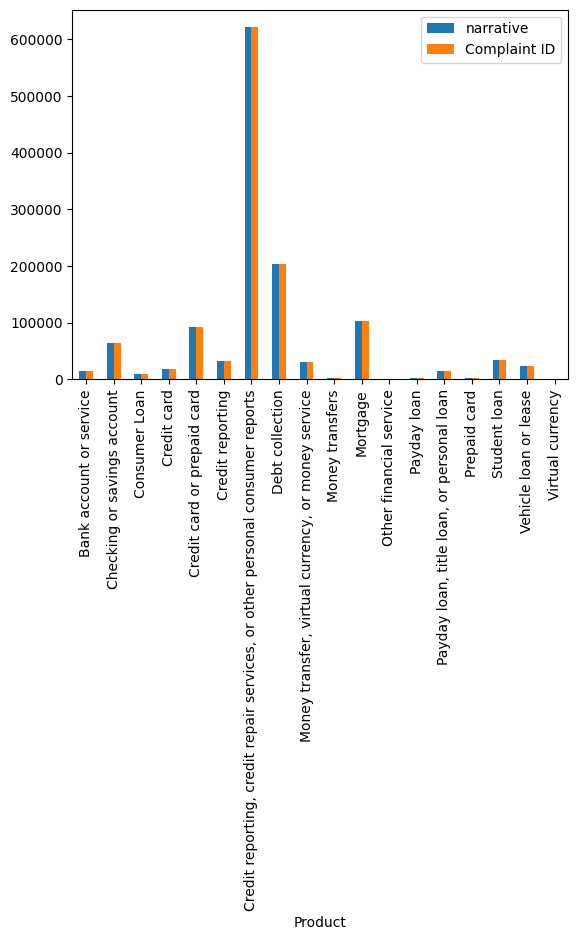

In [ ]:
complaints.groupby('Product').count().plot(kind='bar')

In [ ]:
dt = []
for i in tqdm.tqdm(complaints['narrative'].iloc):
  dt.append(len(i.split()))
dt = np.array(dt)

1264742it [00:17, 73422.37it/s]


In [ ]:
dt

array([1817,  110,   54, ...,   73,  194,  200])

In [ ]:
print("The average number of words in a document is: {}.".format(np.mean(dt)))
print("The minimum number of words in a document is: {}.".format(min(dt)))
print("The maximum number of words in a document is: {}.".format(max(dt)))
print("Lower then 5 words documents: {}".format(sum(dt <= 5)))


The average number of words in a document is: 185.81951259624492.
The minimum number of words in a document is: 1.
The maximum number of words in a document is: 6314.
Lower then 5 words documents: 2781


<ipython-input-33-8a30a99abbcf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt, bins=50, ax=ax)


<Axes: title={'center': 'Distribution of number of words'}, xlabel='Number of words', ylabel='Density'>

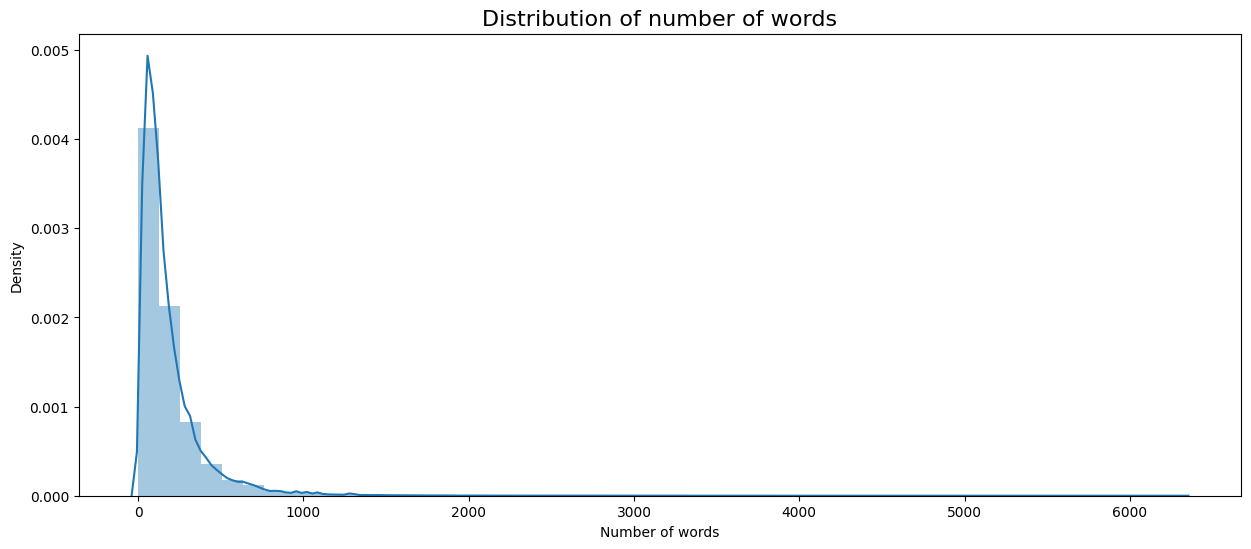

In [ ]:
# Distribution graph
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(dt, bins=50, ax=ax)


In [ ]:
pivot_data = complaints.copy()
pivot_data["words_cnt"] = dt

In [ ]:
pivot_data.head(2)

,Product,narrative,Complaint ID,words_cnt
2,Mortgage,This complaint/letter serves as an appeal of t...,4729864,1817
7,"Credit reporting, credit repair services, or o...",I am XXXX XXXX XXXX and I am submitting this c...,4906602,110


In [ ]:
comp1_dist = pd.pivot_table(pivot_data, values="words_cnt", index=['Product'], aggfunc={'words_cnt': [np.mean, min, max,np.std]})
comp1_dist

,max,mean,min,std
Product,,,,
Bank account or service,1284,229.883440,1,176.696177
Checking or savings account,6014,236.109968,1,256.265035
Consumer Loan,845,207.503065,3,170.642189
Credit card,831,207.657713,2,164.604975
Credit card or prepaid card,5735,228.832257,1,233.560985
Credit reporting,840,134.935100,2,129.307562
"Credit reporting, credit repair services, or other personal consumer reports",6024,153.520832,1,194.980977
Debt collection,6095,172.500212,1,220.652390
"Money transfer, virtual currency, or money service",5988,223.486154,1,260.543778


In [ ]:
# Release memory
import gc

gc.collect()

del comp1_dist
del pivot_data
del dt
gc.collect()

NameError: ignored

In [ ]:
# TODO BUILD GRAPH of words mean/avgs from table above

In [ ]:
!pip3 install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=9a6d20e9bc92ae80b758069ad5880a62404d994a7070c51b2e13dbff02bcde03
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


In [ ]:
complaints.iloc[0].narrative

'This complaint/letter serves as an appeal of the denial by Flagstar bank of our application for loss mitigation. Although we have been supplied insufficient information to provide a complete appeal, this letter serves as our best effort given the current situation. We submitted 43 pages of documentation in our loss mitigation application, beginning on XX/XX/XXXX. This process took hours of work, and multiple phone calls to the Flagstar customer support/hardship task force line to work this process out. The online application was incorrectly entering a date, so we were instructed to print and manually file the paperwork, then upload it to the portal which we did. I called to follow up, and was notified at that time verbally ( Friday XX/XX/XXXX ) that more documentation was needed. We completed this other documentation and uploaded on the portal Saturday XX/XX/XXXX. \n\nOn Tuesday XX/XX/XXXX I again called to validate that all documentation was received and was in proper order. It was a

In [ ]:
import nltk
import re
import spacy

nltk.download('punkt')


nlp = spacy.load("en_core_web_sm")
for stop in ["XXX", "XX", "XXXX", "xxxx", "xxxxxxxx"]:
  nlp.Defaults.stop_words.add(stop)

def preprocess_text(text: str) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    #text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    # 1. tokenize
    tokens = nltk.word_tokenize(text)
    # 2. check if stopword
    tokens = [w for w in tokens if not w.lower() in nlp.Defaults.stop_words]
    text = " ".join(tokens)
    text = text.lower().strip()
    return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
%%time
lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop and token.is_alpha)

  1%|          | 8646/1264742 [00:05<14:14, 1469.50it/s]


KeyboardInterrupt: ignored

In [ ]:
import spacy

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
tqdm.tqdm.pandas()


nlp = spacy.load("en_core_web_sm")
# Add custom stop words
for stop in ["XXX", "XX", "XXXX", "xxxx", "xxxxxxxx"]:
  nlp.Defaults.stop_words.add(stop)


def preprocess_text(complaints):
  print("Removing stop words, symbols and make lemmatization")
  #complaints["processed"] = complaints.narrative.parallel_apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop and token.is_alpha))
  complaints['processed'] = complaints['narrative'].progress_apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop and token.is_alpha))
preprocess_text(complaints)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
Removing stop words, symbols and make lemmatization


 11%|█         | 141392/1264742 [1:05:57<8:44:00, 35.73it/s]


KeyboardInterrupt: ignored

In [ ]:
complaints

,Product,narrative,Complaint ID
2,Mortgage,This complaint/letter serves as an appeal of t...,4729864
7,"Credit reporting, credit repair services, or o...",I am XXXX XXXX XXXX and I am submitting this c...,4906602
11,"Credit reporting, credit repair services, or o...",in accordance with the Fair Credit Reporting a...,5274806
17,"Credit reporting, credit repair services, or o...",Unauthorized inquiries were discovered on my m...,5271604
18,Credit card or prepaid card,I have a card through comenity bank. I think t...,5993564
...,...,...,...
3511753,Mortgage,Can you let me know why after i paid my $ XXXX...,5616076
3511797,Mortgage,"On XX/XX/XXXX Tuesday, after I switched my cho...",5307930
3511825,Mortgage,"After falling behind on our mortgage in 2011, ...",2018364
3511826,Bank account or service,"Hello, I opened a CitiGold checking account wi...",2009169


In [ ]:
from joblib import Parallel, delayed

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in nlp.Defaults.stop_words] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe



def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(complaints), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time
complaints['lem'] = preprocess_parallel(complaints['narrative'], chunksize=1000)

KeyboardInterrupt: ignored

In [ ]:
!pip3 install yake

In [ ]:
complaints.iloc[0]

Product                                                  Mortgage
narrative       This complaint/letter serves as an appeal of t...
Complaint ID                                              4729864
Name: 2, dtype: object

In [ ]:
import yake

kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
dedup_threshhold = 0.9
numOfKeywords = 5
extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=dedup_threshhold, top=numOfKeywords, features=None)
text = " ".join(token.lemma_ for token in nlp(complaints.iloc[0].narrative) if not token.is_stop and token.is_alpha)
keywords = extractor.extract_keywords(text)
print(keywords)

[('VAPCP Refund', 0.00017857670866535966), ('Flagstar bank', 0.00019363749789967893), ('Home Retention', 0.00021526622663790057), ('loss mitigation', 0.0002180538674508001), ('COVID VAPCP', 0.0002403162058323294)]


In [ ]:
complaints.head()

,Product,narrative,Complaint ID
2,Mortgage,This complaint/letter serves as an appeal of t...,4729864
7,"Credit reporting, credit repair services, or o...",I am XXXX XXXX XXXX and I am submitting this c...,4906602
11,"Credit reporting, credit repair services, or o...",in accordance with the Fair Credit Reporting a...,5274806
17,"Credit reporting, credit repair services, or o...",Unauthorized inquiries were discovered on my m...,5271604
18,Credit card or prepaid card,I have a card through comenity bank. I think t...,5993564


In [ ]:
complaints = complaints.drop("processed", axis=1)